**1. Clone yolov5 repository from ultralytics**

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16008, done.
remote: Total 16008 (delta 0), reused 0 (delta 0), pack-reused 16008
Receiving objects: 100% (16008/16008), 14.51 MiB | 25.23 MiB/s, done.
Resolving deltas: 100% (11012/11012), done.
/content/yolov5


**2. Install all requirements**

In [ ]:
%pip install -qr requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.6/612.6 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00


**3. Dataset uploading**

Unzip the dataset folder to obtain the dataset.<br>
The dataset consists of training and validation set of images and labels under 'train' and 'val' folders.<br>The dataset is created using https://www.makesense.ai/

In [ ]:
!unzip  /content/hen_dataset.zip   -d /content

Archive:  /content/hen_dataset.zip
   creating: /content/train_data_hen/
   creating: /content/train_data_hen/images/
   creating: /content/train_data_hen/images/train/
  inflating: /content/train_data_hen/images/train/1.jpg  
  inflating: /content/train_data_hen/images/train/10.jpg  
  inflating: /content/train_data_hen/images/train/11.jpg  
  inflating: /content/train_data_hen/images/train/12.jpg  
  inflating: /content/train_data_hen/images/train/13.jpg  
  inflating: /content/train_data_hen/images/train/14.jpg  
  inflating: /content/train_data_hen/images/train/15.jpg  
  inflating: /content/train_data_hen/images/train/16.jpg  
  inflating: /content/train_data_hen/images/train/17.jpg  
  inflating: /content/train_data_hen/images/train/18.jpg  
  inflating: /content/train_data_hen/images/train/19.jpg  
  inflating: /content/train_data_hen/images/train/2.jpeg  
  inflating: /content/train_data_hen/images/train/20.jpg  
  inflating: /content/train_data_hen/images/train/21.jpg  
  infl

**4. Set data-configurations file**

The data-configurations file describes the dataset parameters.<br>Edit this file and provide: the paths to the train, validation and test (optional) datasets and the names of the classes in the same order as their index.<br> Here there is only one class, named ‘hen’ and class:0. <br>The custom data configurations file is saved as ‘hen_custom.yaml’ under the ‘data’ directory. <br>The content of this YAML file is displayed using 'cat' command as follows:

In [ ]:
!cat data/hen_custom.yaml

# dataset root dir
path: /content/hen_dataset  

# train images (relative to 'path')
train: images/train  

# val images (relative to 'path') 
val: images/val  


test:  # test images (optional)

# Classes
names:
  0: Hen

**5.Training - Transfer Learning**

For training, custom dataset is created with 31 images for training and 9 images for validation which are stored in 'images' folder.<br> Corresponding labels are saved in 'train' and 'val' folder in 'labels' folder.<br> The labels are text files. Each text file contains one bounding-box (BBox) annotation for each of the objects in the image.The format is as:<br> object-class-ID X-center Y-center Box-width Box-height

As the dataset is too small, YOLOv5s6 pretrained model is used.<br> For the model, we use the same backbone as the pretrained COCO model, and only train the model’s head. <br>YOLOv5s6 backbone consists of 12 layers, which will be freezed by the ‘freeze’ argument.Training is done using 'train.py' script.

*   batch — batch size (-1 for auto batch size). Use the largest batch size that your hardware allows for.
*   epochs — number of epochs.
*   data — path to the data-configurations file.
*   cfg — path to the model-configurations file
*   weights — path to initial weights.
*  cache — cache images for faster training.
*  img — image size in pixels (default — 640).
*   freeze — number of layers to freeze
*   project— name of the project
*   name — name of run

In [ ]:
!python train.py --batch 4 --epochs 100 --data data/hen_custom.yaml --weights yolov5s6.pt --cache --freeze 12

train: weights=yolov5s6.pt, cfg=, data=data/hen_custom.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-187-g0004c74 Python-3.10.12 torch-2.0.1+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, t

**6. Display Results**

Results are automatically saved to ‘runs/train’ directory.<br>Display results.png to view the metrics and losses<br>The results can be saved in custom folder by using 'project' and 'name' argument.

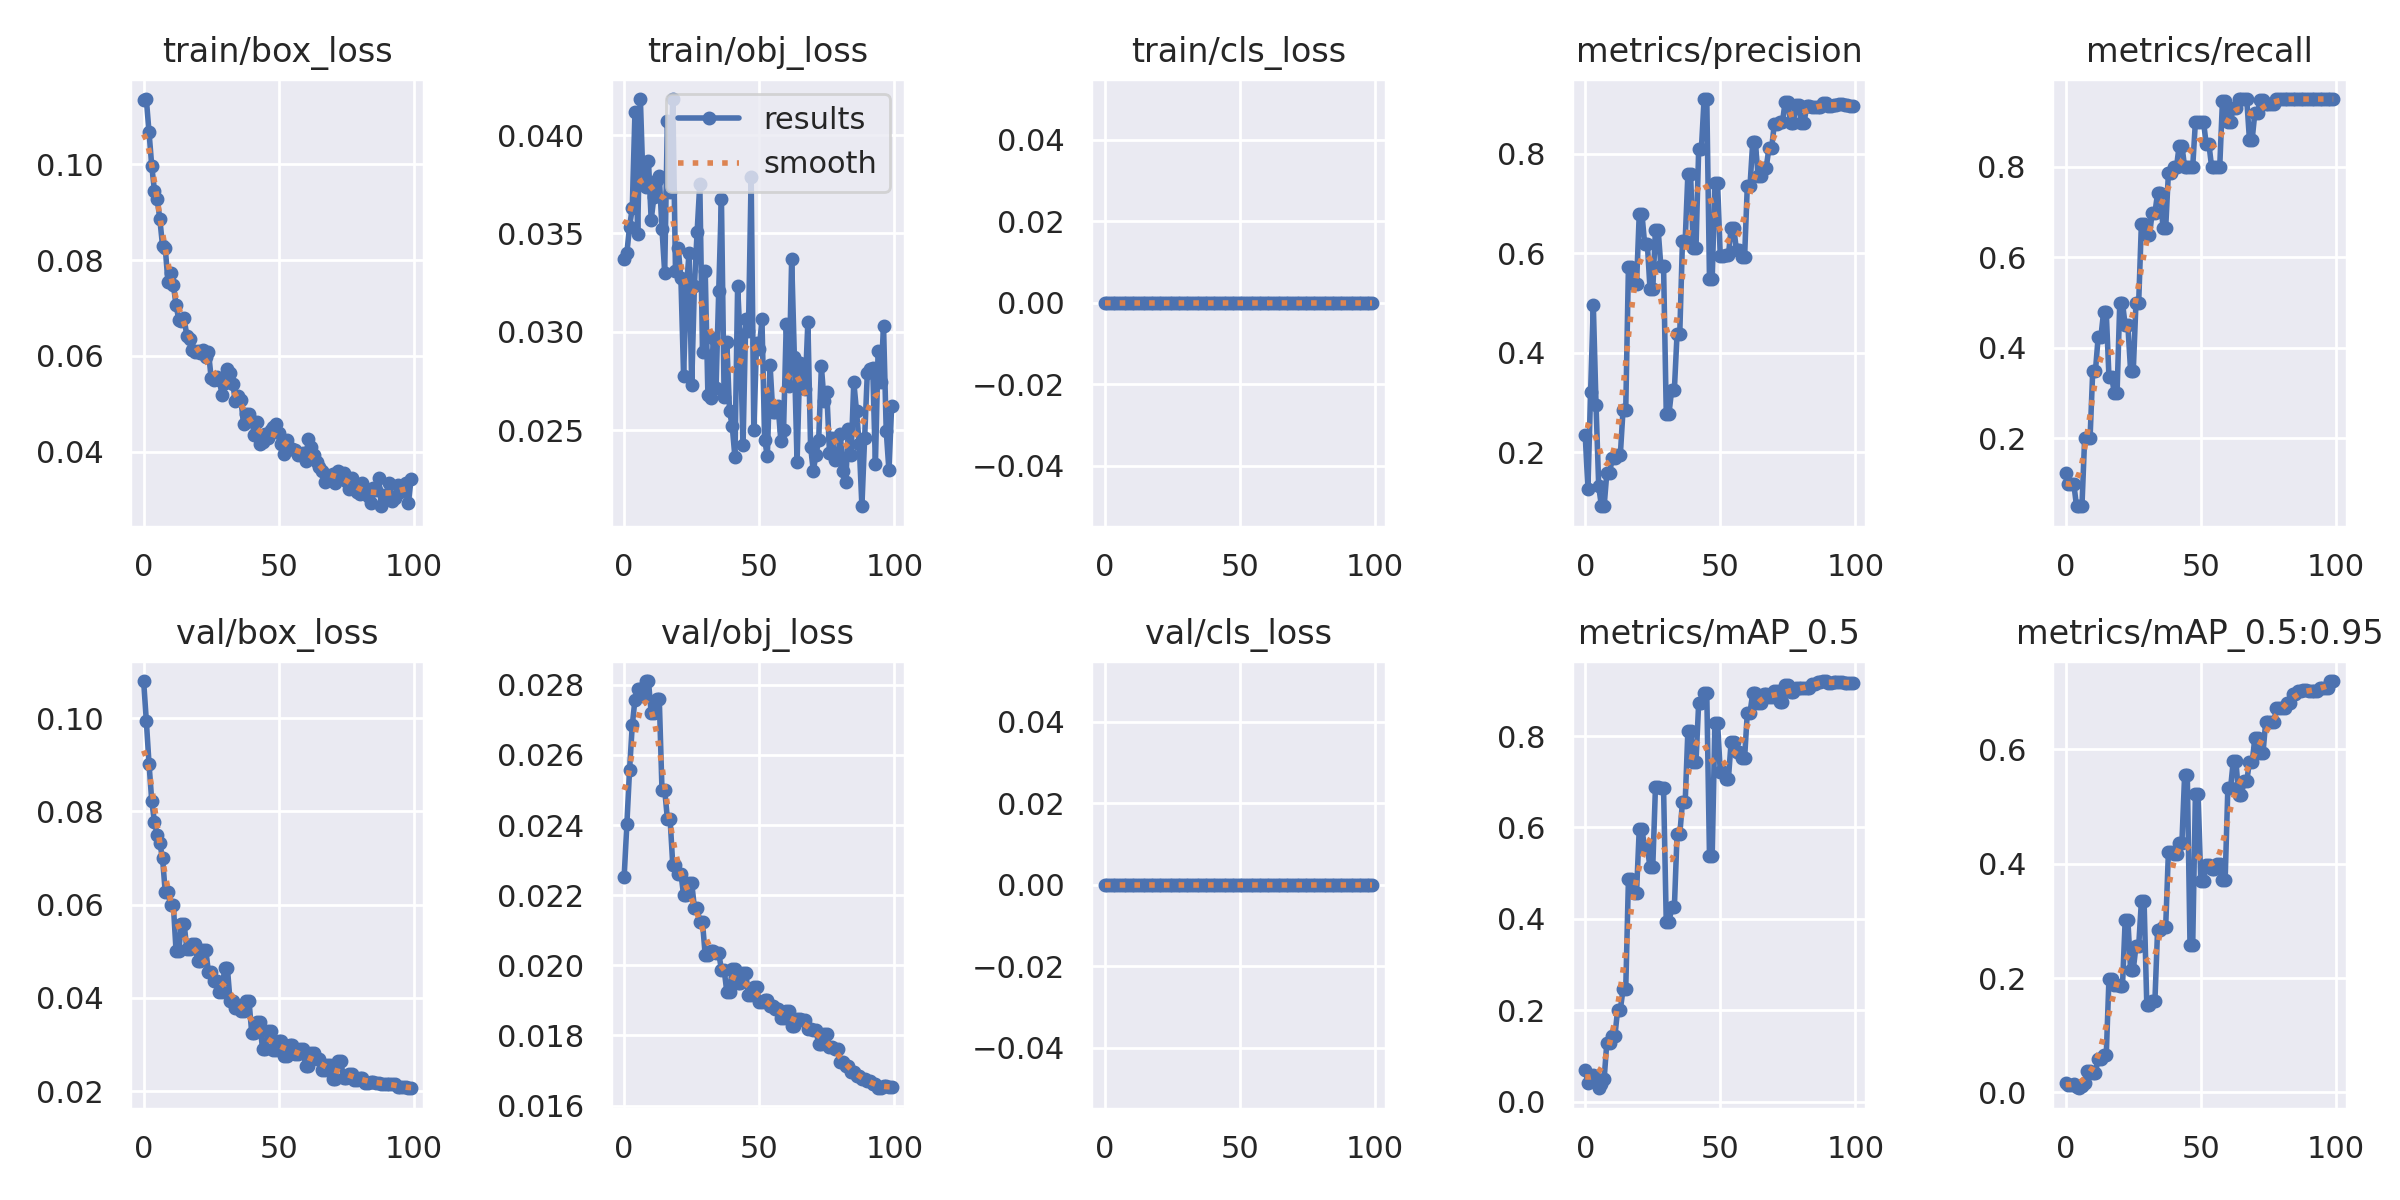

In [ ]:
from IPython import display
display.Image(f"runs/train/exp/results.png")

**7. Fine Tuning**

This step is optional. Fine tuning is done using the hyperparameters saved in the inbuilt hyp.VOC.yaml file.<br>It means un-freezing the entire model we obtained above, and re-training it on our data with a very low learning rate.<br>The weights will be initialized with the weights saved on the previous step.

In [ ]:
!python train.py --hyp 'hyp.VOC.yaml' --batch 4 --epochs 80 --data 'data/hen_custom.yaml' --weights runs/train/exp/weights/best.pt --project Fine_tuning --cache

train: weights=runs/train/exp/weights/best.pt, cfg=, data=data/hen_custom.yaml, hyp=hyp.VOC.yaml, epochs=80, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Fine_tuning, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-187-g0004c74 Python-3.10.12 torch-2.0.1+cu118 CPU

hyperparameters: lr0=0.00334, lrf=0.15135, momentum=0.74832, weight_decay=0.00025, warmup_epochs=3.3835, warmup_momentum=0.59462, warmup_bias_lr=0.18657, box=0.02, cls=0.21638, cls_pw=0.5, obj=0.51728, obj_pw=0.67198, iou_t=0.2, anchor_t=3.3744, fl_gamma=0.0, hsv_h=0.01041,

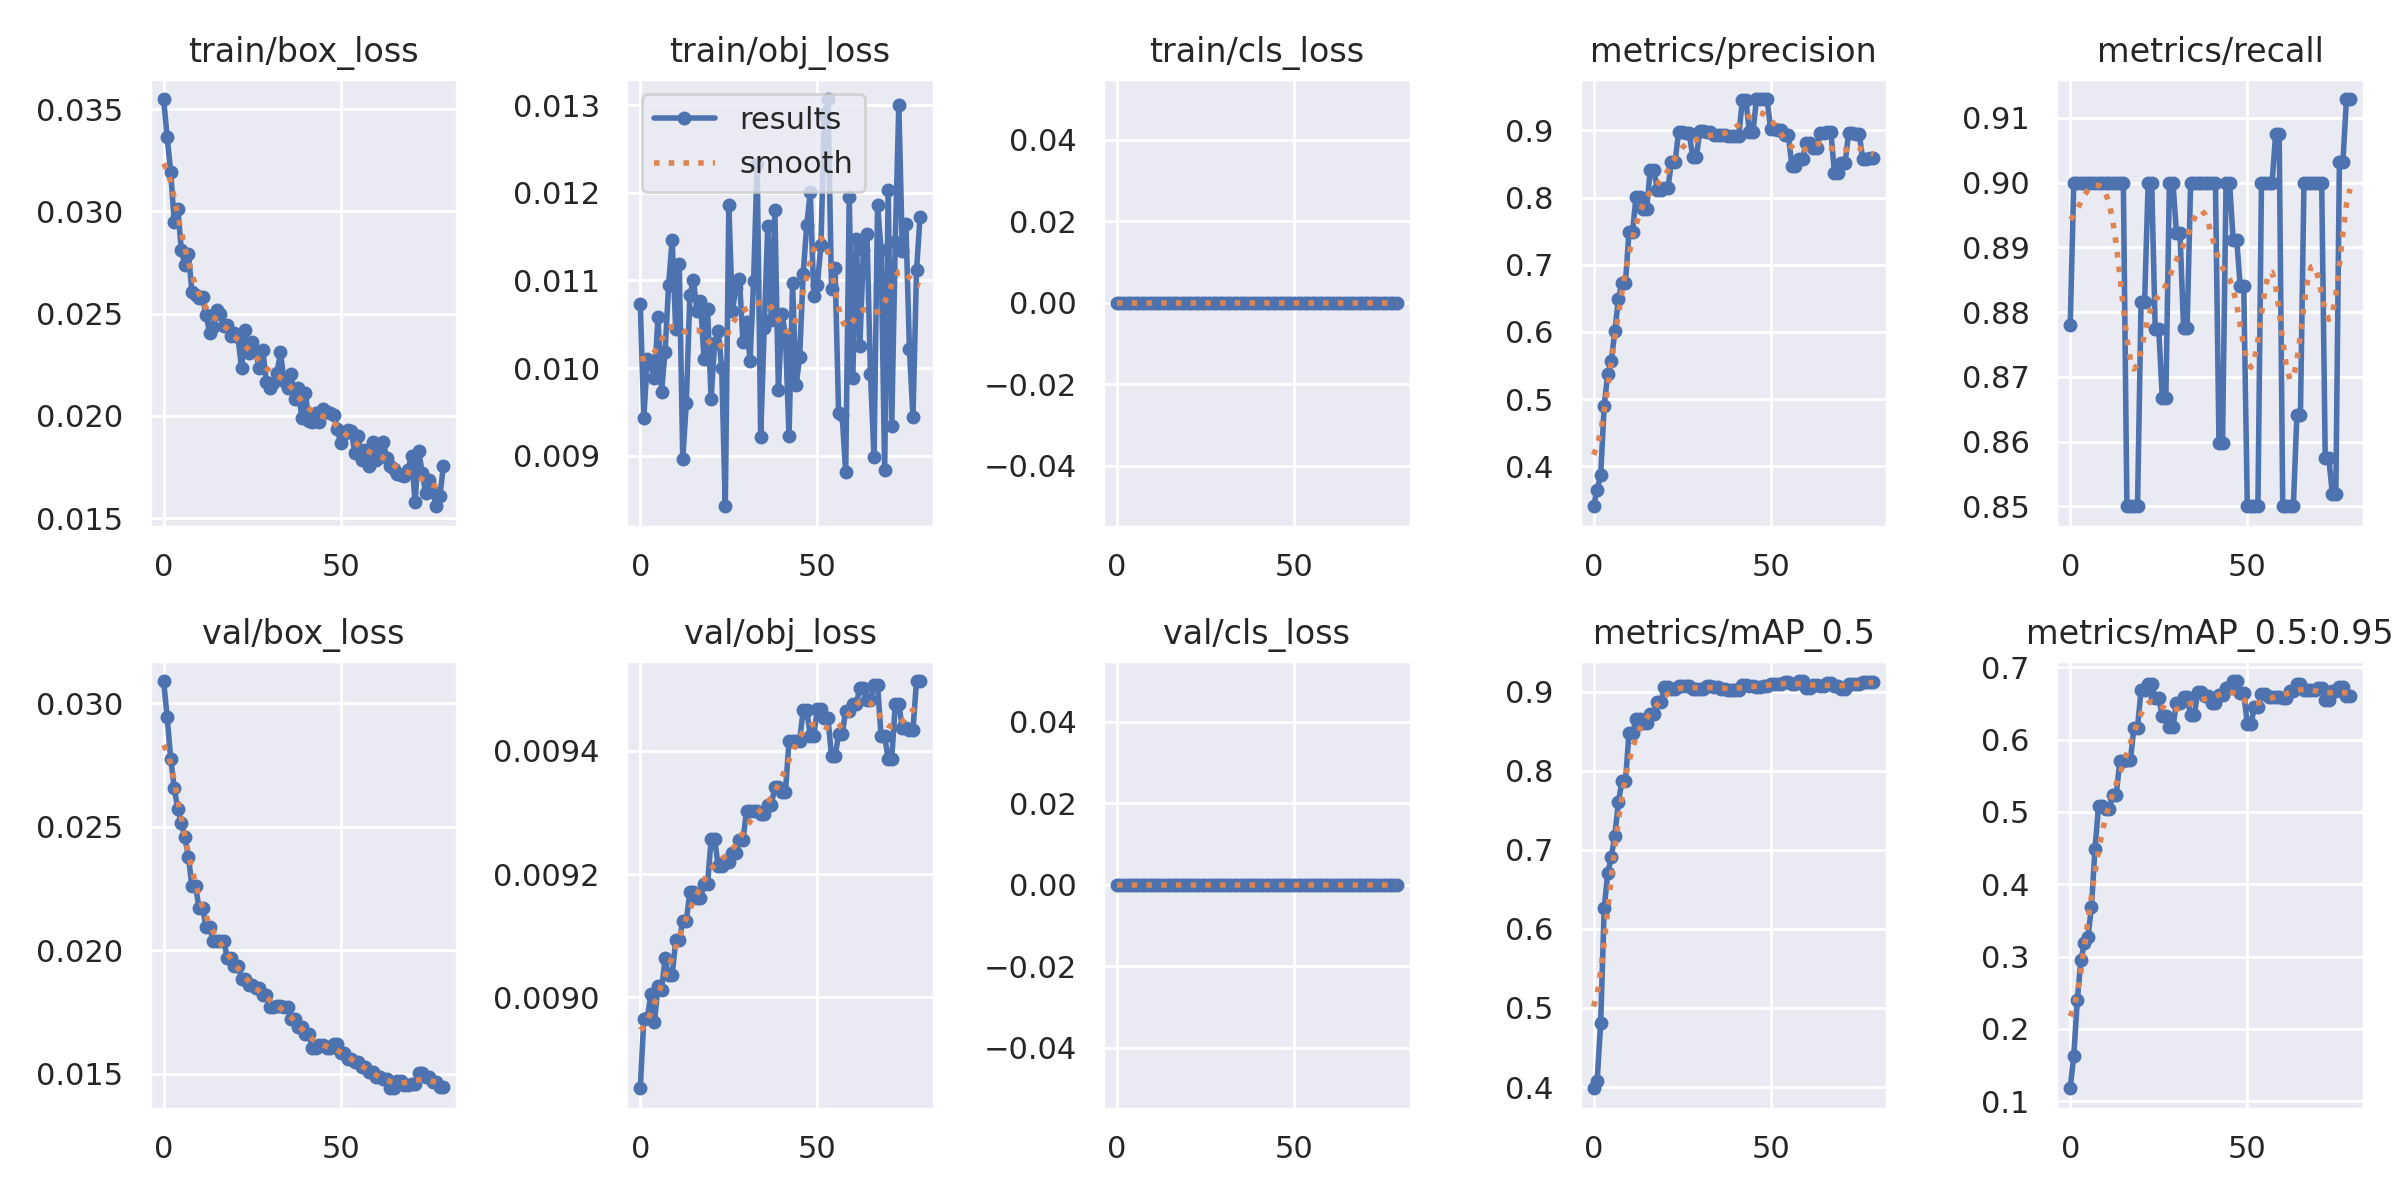

In [65]:
display.Image(f"Fine_tuning/exp/results.png")

**7.Validation**

After fine tuning, the performance is improved.<br>To validate the model, use val.py script.<br>We can use train, test or val dataset. <br>This can be selected using 'task' argument.

In [66]:
!python val.py --weights 'Fine_tuning/exp/weights/best.pt' --batch 8 --data 'data/hen_custom.yaml' --task val --augment

val: data=data/hen_custom.yaml, weights=['Fine_tuning/exp/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-187-g0004c74 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 206 layers, 12308200 parameters, 0 gradients, 16.1 GFLOPs
val: Scanning /content/hen_dataset/labels/val.cache... 9 images, 0 backgrounds, 0 corrupt: 100% 9/9 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:09<00:00,  4.70s/it]
                   all          9         20      0.922        0.9      0.918      0.691
Speed: 8.2ms pre-process, 1014.2ms inference, 7.1ms NMS per image at shape (8, 3, 640, 640)
Results saved to runs/val/exp2


Display F1-Confidence Curve

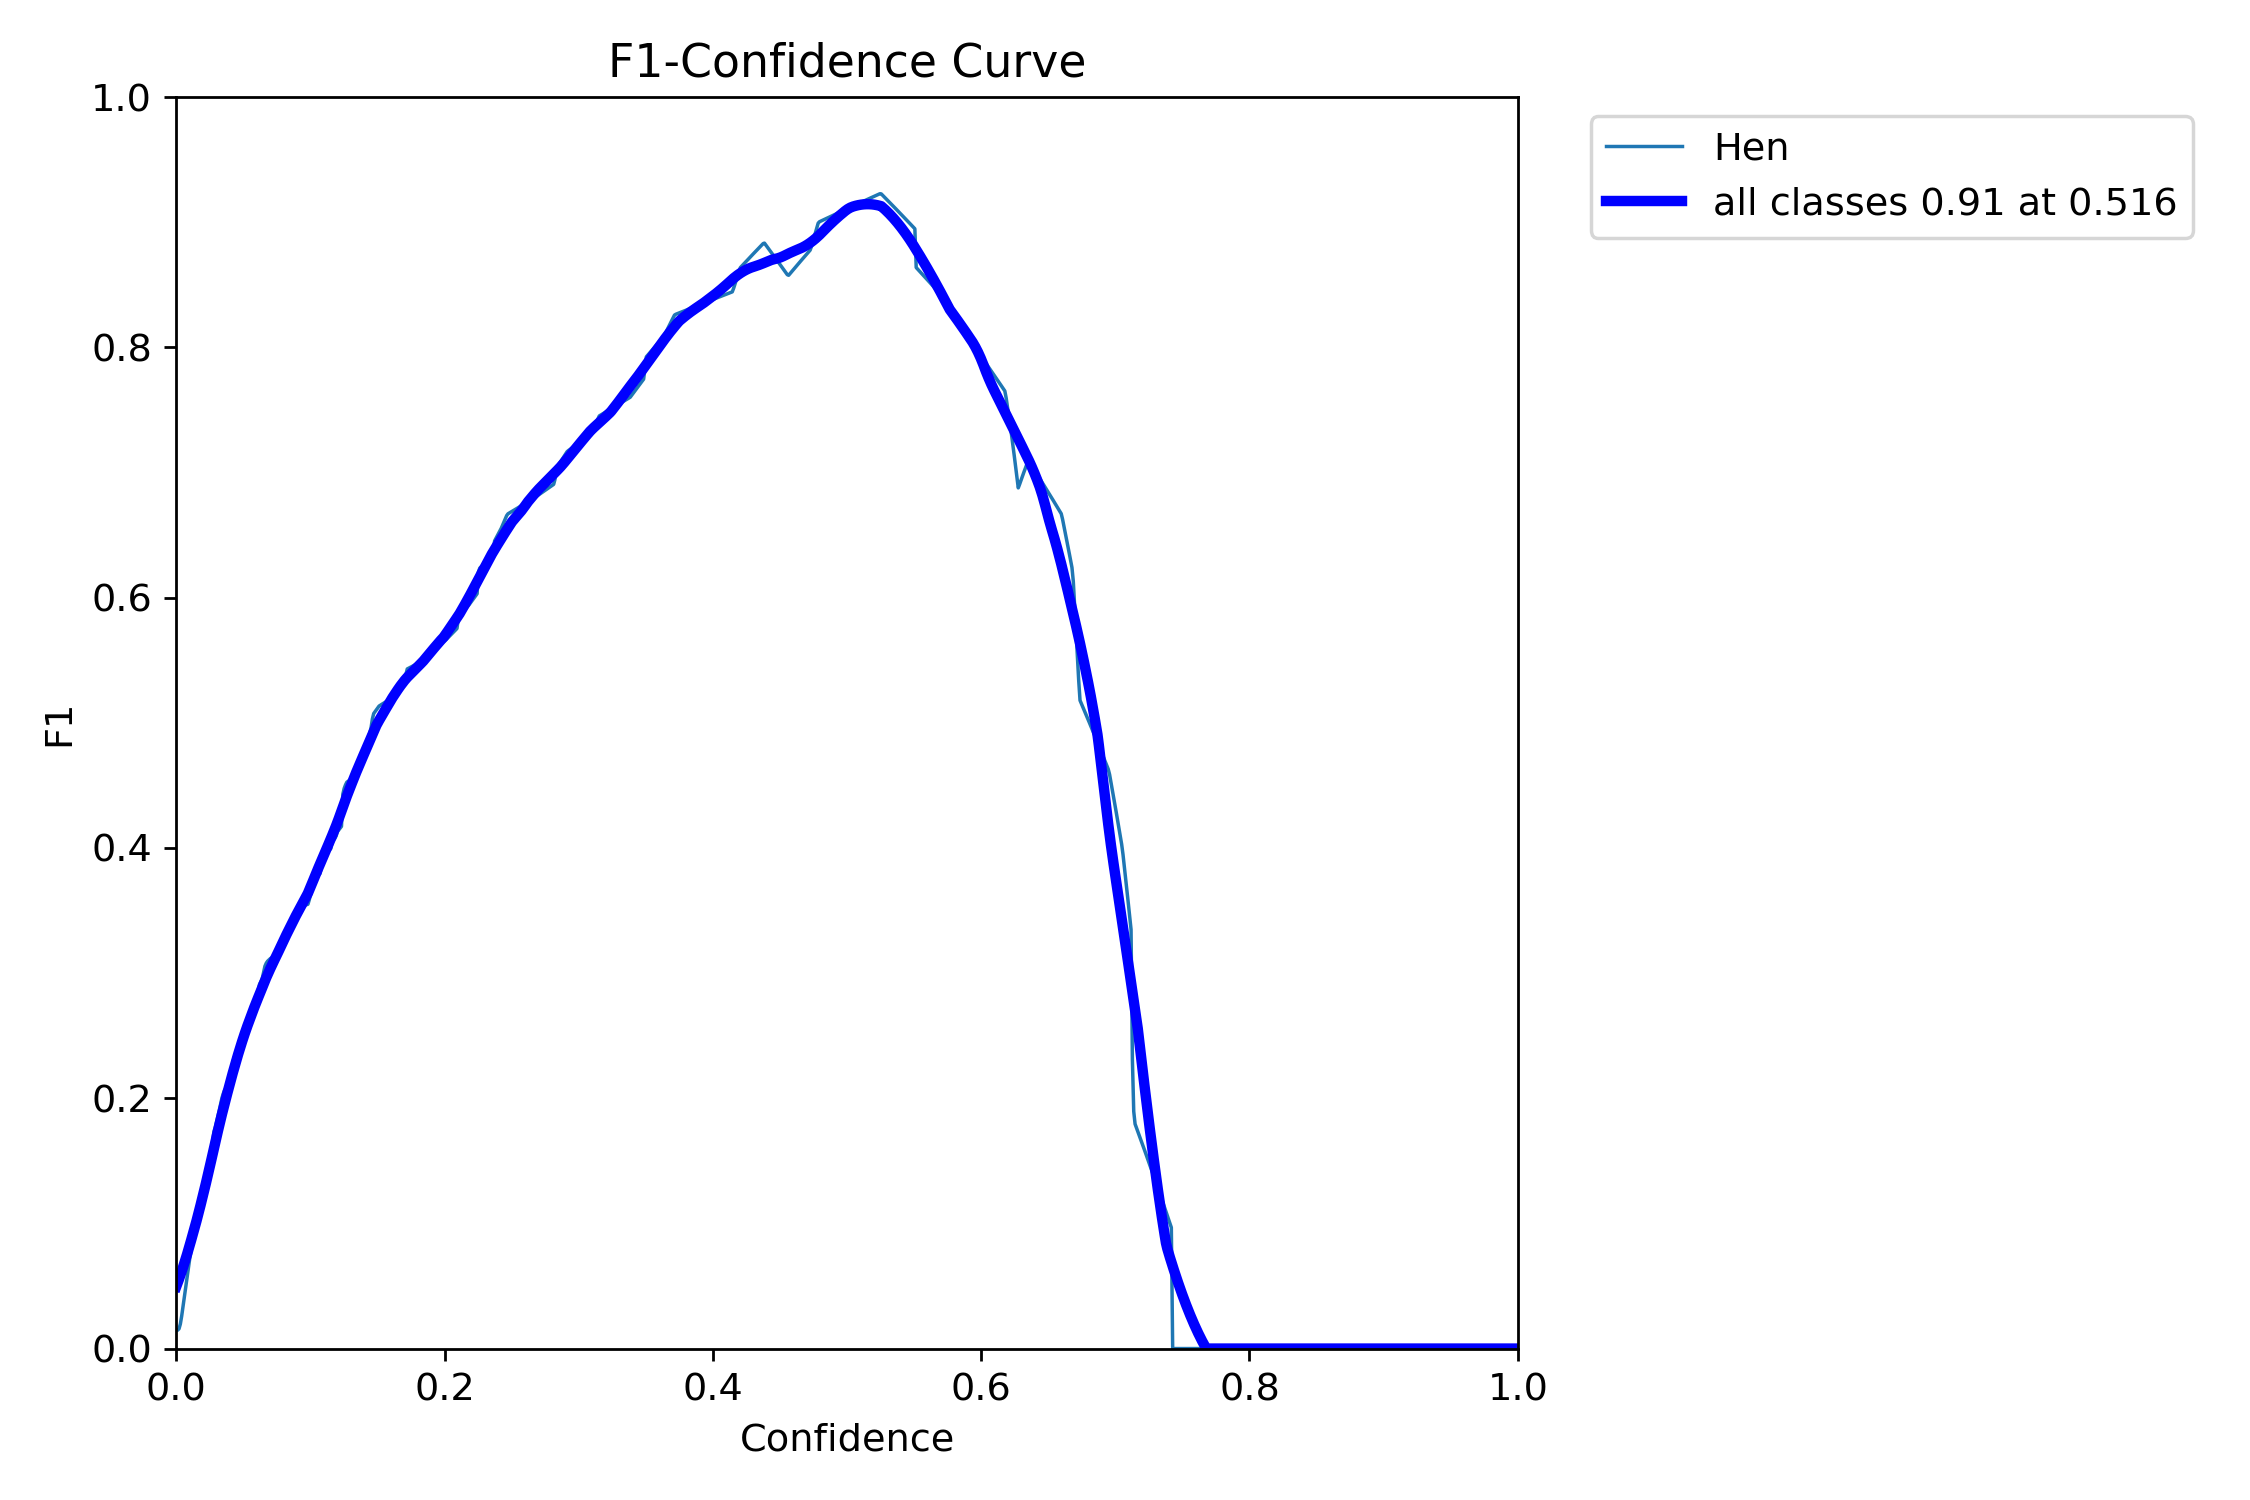

In [67]:
display.Image(f"runs/val/exp2/F1_curve.png")

Display Precision-Recall Curve

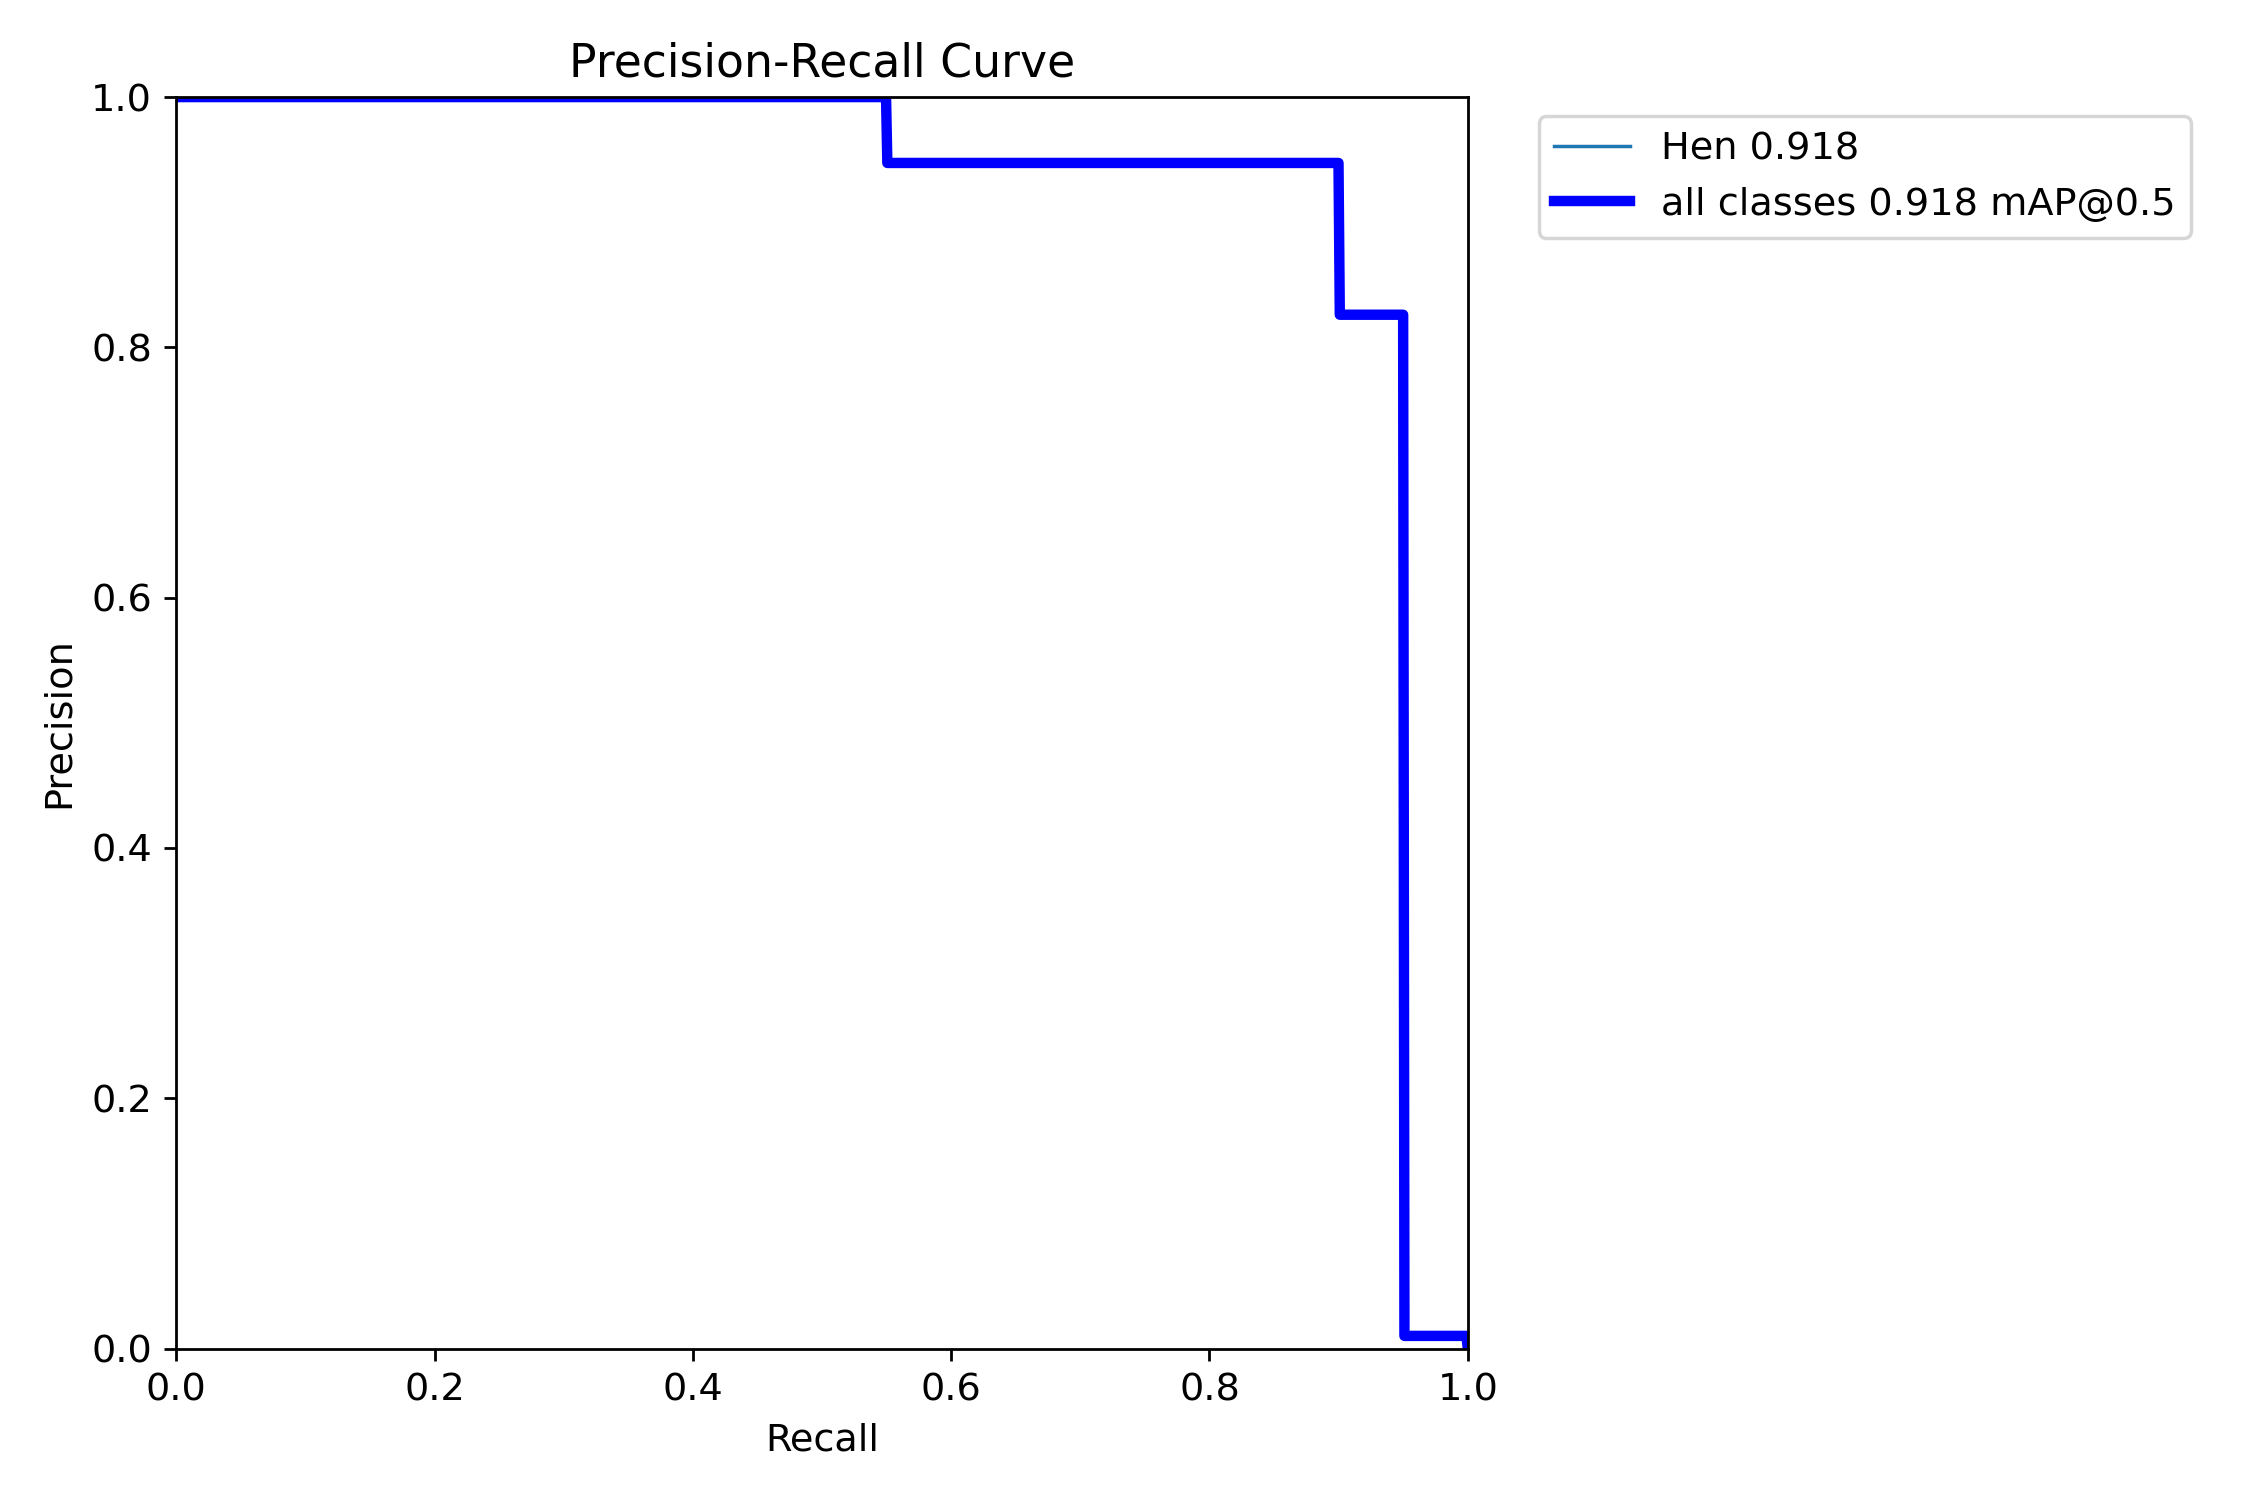

In [69]:
display.Image(f"runs/val/exp2/PR_curve.png")

**8. Inference**


Since the training performance are satisfactory, the model is now ready for inference.<br>The input for inference can be an image, a video, a directory, a webcam, or a stream.<br>The 'detect.py' script is used for inference. <br>The input images for inference are uploaded in 'inference_images.zip' folder.<br> The following code is used to unzip and display the inference input images

In [ ]:
!unzip  /content/Inference_images.zip   -d /content

In [74]:
import glob
import cv2

path = r'/content/Inference_images'
images = []

for img in glob.glob("/content/Inference_images/*.png"):
    image= cv2.imread(img,cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)

#images = [cv2.imread(file) for file in glob.glob("/content/Inference_images/*.png")]

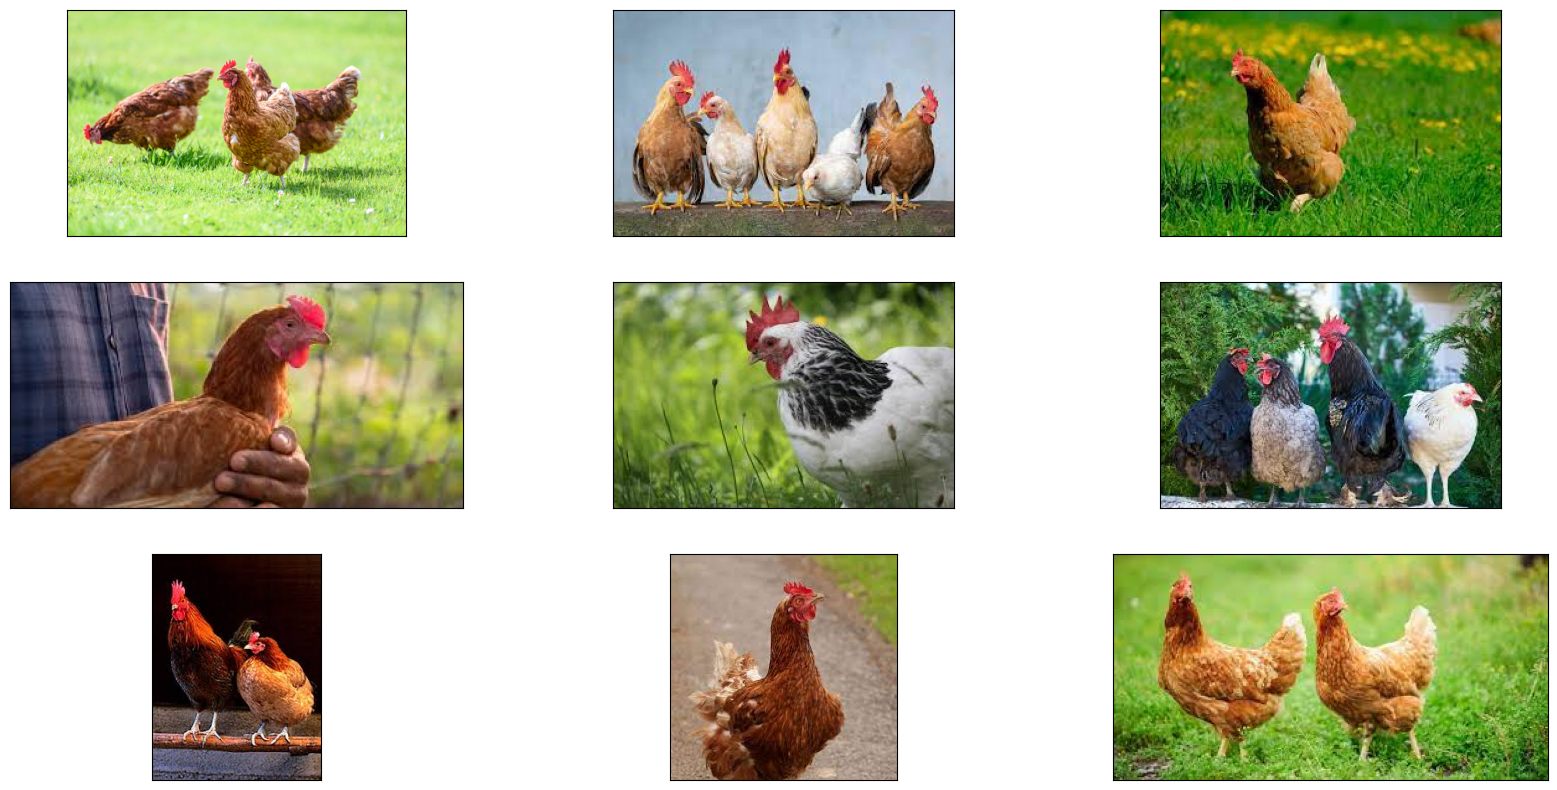

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
for i, image in enumerate(images):
  plt.subplot(3,3,i+1)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])


In the following detection command the test data is used for inference.
*   source — input path (0 for webcam)
*   weights — weights path
*   img — image size for inference, in pixels
*   conf — confidence threshold
*   iou — IoU threshold for NMS (Non Max Supression)
*   augment — augmented inference (TTA)
<br>The predictions accuracy can be further boost by applying test-time augmentations (TTA): each image is being augmented (horizontal flip and 3 different resolutions), and the final prediction is an ensemble of all these augmentation.







In [79]:
!python detect.py --weights Fine_tuning/exp/weights/best.pt  --conf 0.45 --source /content/Inference_images --name 'infer_test'

detect: weights=['Fine_tuning/exp/weights/best.pt'], source=/content/Inference_images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.45, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=infer_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-187-g0004c74 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 206 layers, 12308200 parameters, 0 gradients, 16.1 GFLOPs
image 1/9 /content/Inference_images/hen1.png: 448x640 4 Hens, 300.8ms
image 2/9 /content/Inference_images/hen2.png: 448x640 1 Hen, 253.1ms
image 3/9 /content/Inference_images/hen3.png: 640x640 1 Hen, 404.3ms
image 4/9 /content/Inference_images/hen4.png: 384x640 2 Hens, 244.7ms
image 5/9 /content/Inference_images/hen5.png: 448x640 3 Hens, 272.6ms
image 6

**9. Display Predictions**

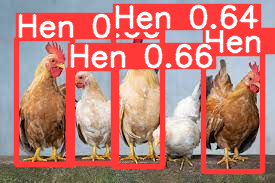

In [80]:
display.Image(f"/content/yolov5/runs/detect/infer_test2/hen1.png")

In [83]:
infer_images = []
for img in glob.glob("/content/yolov5/runs/detect/infer_test2/*.png"):
    image= cv2.imread(img,cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    infer_images.append(image)

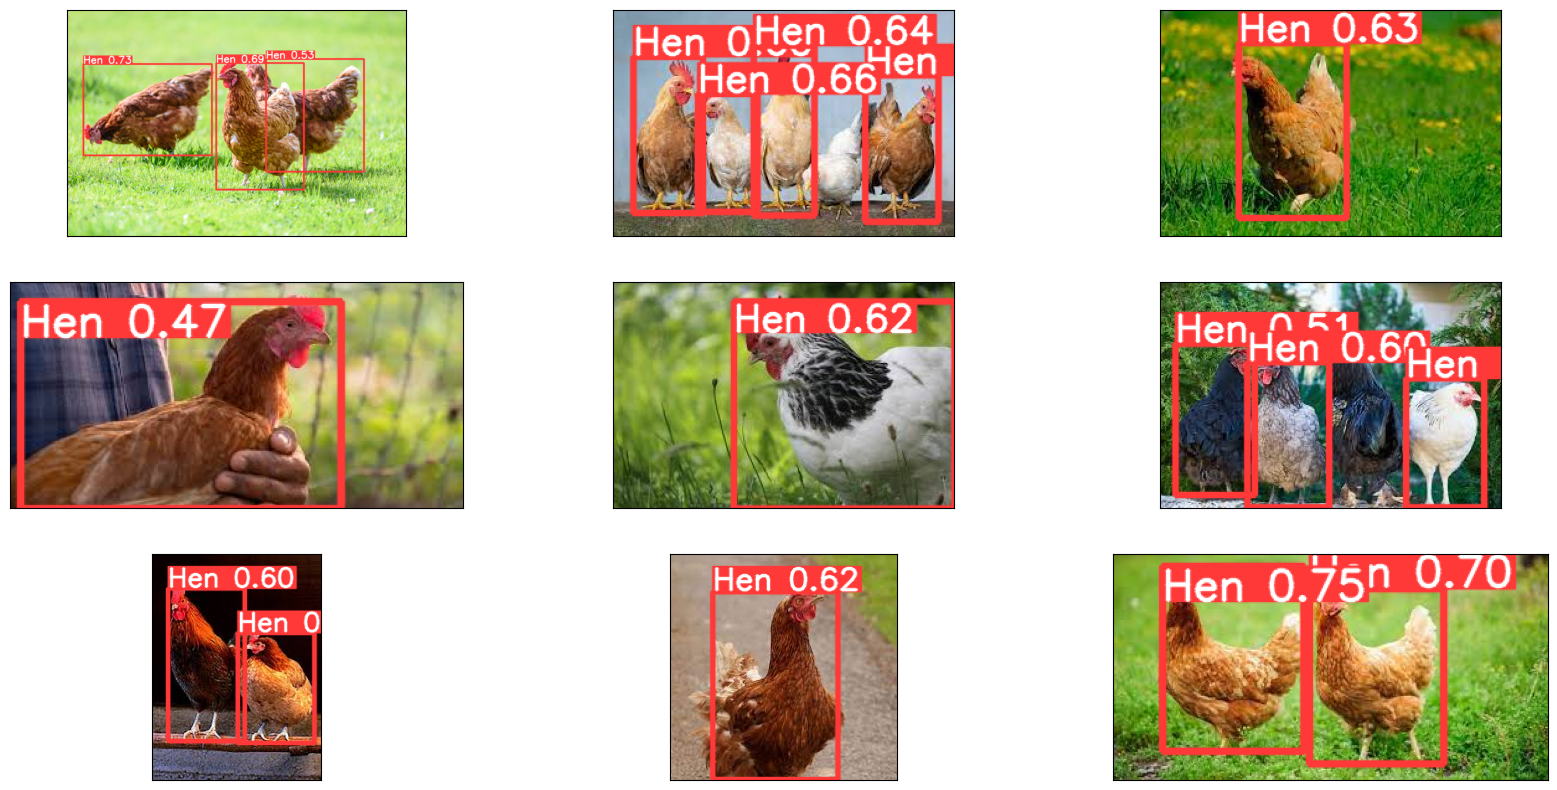

In [84]:
plt.figure(figsize=(20,10))
for i, image in enumerate(infer_images):
  plt.subplot(3,3,i+1)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

**Reference**

*   https://github.com/ultralytics/yolov5
*   https://towardsdatascience.com/the-practical-guide-for-object-detection-with-yolov5-algorithm-74c04aac4843
*   https://www.makesense.ai/


